In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import TensorLearning as tl

In [2]:
df = pd.read_csv("fashion-mnist_train.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
Y = (df.values)[:, 0]
X = (df.values)[:, 1:]
print('X =', X)
print()
print('Y =', Y)

X = [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Y = [2 9 6 ... 8 8 7]


In [4]:
print(X.shape, Y.shape)

(60000, 784) (60000,)


In [5]:
# Shuffle data to avoid bias from ordering.
num_samples = X.shape[0]
idx = np.arange(num_samples)
np.random.shuffle(idx)
X = X[idx,:]
Y = Y[idx]

In [6]:
# Split data in train and validate datasets.
X_train = X[:50000, :]
Y_train = Y[:50000]
X_val = X[50000:, :]
Y_val = Y[50000:]

In [7]:
# Load test dataset.
df_test = pd.read_csv("fashion-mnist_test.csv")
Y_test = (df_test.values)[:, 0]
X_test = (df_test.values)[:, 1:]

In [8]:
# Normalize data.
X_train, mu, sigma = tl.normalization(X_train, method='mean_normalization')
print('mean =', mu, 'sigma =', sigma)

mean = 72.97432102040817 sigma = 255


In [9]:
# p is the level of precision of the PCA function. The function 'prepare_data' also add a bias input to 
# the train dataset.
p = 0.999
X_bias, U = tl.prepare_data(X_train, p)

# Normalize and make pca with validation dataset.
X_val = tl.norm_pca(X_val, U, mu, sigma)

# Print the dimensions of the dataset to be used in the training.
print('Train dataset dimensions =', X_bias.shape)

Train dataset dimensions = (50000, 655)


Epoch 1: [==========================================================================================] 100.00%
Epoch 2: [==========================================================================================] 100.00%
Epoch 3: [==========================================================================================] 100.00%
Epoch 4: [==========================================================================================] 100.00%
Epoch 5: [==========================================================================================] 100.00%
Epoch 6: [==========================================================================================] 100.00%
Epoch 7: [==========================================================================================] 100.00%
Epoch 8: [==========================================================================================] 100.00%
Epoch 9: [==========================================================================================] 100.00%
Epoch 10: 

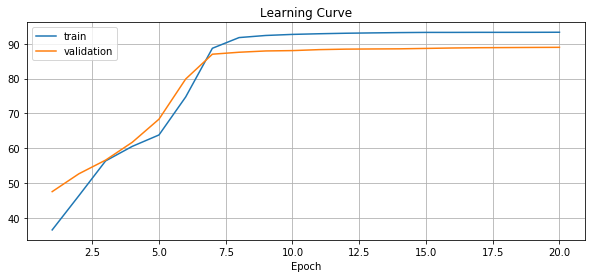

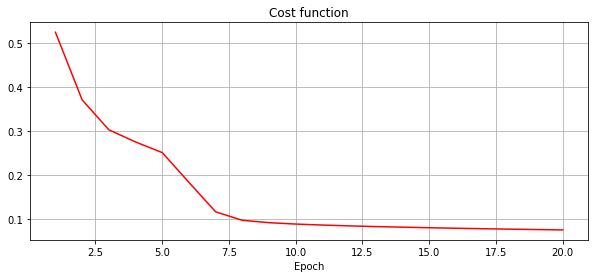

R = 20 batch = 1
Dataset accuracy( 1 ) = 90.533 %



In [10]:
# TRAINING

# Number of factor matrices (order of the tensors)
L = 3
# Rank
R = 20
# Learning rate parameter
alpha = 0.01
# Learning decay parameter
alpha_decay = 0.9
# Regularization parameter
Lambda = 0.001
# Number of epochs
epochs = 20
# Batch size
batch = 1

# Initialize weights
m = int(max(Y)) + 1
n = X_bias.shape[1]
W = tl.init_W(m, L, n, R)

# Train model
W, accuracy, accuracy_val, cost_function, success = tl.cpd_train(X_bias, Y, X_val, Y_val, W, 
                                                                 alpha=alpha, alpha_decay=alpha_decay, 
                                                                 Lambda=Lambda, 
                                                                 epochs=epochs, batch=batch, 
                                                                 display=True)

accuracy_dataset = tl.cpd_test(X, Y, W, U, mu=mu, sigma=sigma)
print('Accuracy over all dataset =', np.round(accuracy_dataset, 3), '%')
print('===============================================')
print()

In [11]:
# Accuracy over test dataset.
accuracy_dataset = tl.cpd_test(X_test, Y_test, W, U, mu=mu, sigma=sigma)
print('Accuracy over test dataset =', np.round(accuracy_dataset, 3), '%')
print('===============================================')
print()

R = 20 batch = 1
Dataset accuracy( 1 ) = 88.8 %

